In [1]:
# onedrive = r"C:\Users\mikek\OneDrive"
onedrive = r"C:\Users\Mike.Kryajak\OneDrive"
# %matplotlib ipympl
# %matplotlib qt
# %matplotlib widget
%matplotlib inline

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray
import xbout
import scipy
import re

# sys.path.append(r"C:\Users\Mike\OneDrive\Project\sdtools")
sys.path.append(os.path.join(onedrive,r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive,r"Project\python-packages"))

from gridtools.hypnotoad_tools import *
from gridtools.b2_tools import *
from gridtools.utils import *

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from code_comparison.code_comparison import *
from code_comparison.viewer_2d import *


%load_ext autoreload
%autoreload 2


print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Gridtools not found

st40_phys_viewer can not be loaded from outside Tokamak Energy!

Gridtools not found


ImportError: cannot import name '_cntr' from 'legacycontour' (unknown location)

In [3]:
casestore = read_file(r"C:\Users\mikek\OneDrive\Project\collab\tech\notebooks\c1.pkl")

C:\Users\mikek\OneDrive\Project\collab\tech\notebooks\b1-lineplot-comparison.pkl loaded


In [7]:
casestore = dict()

In [8]:
db = CaseDB(
    case_dir = os.path.join(onedrive, r"Project\collab\tech\cases"),
    grid_dir = os.path.join(onedrive, r"Project\collab\tech\grid")
)

toload = [
    dict(name="viscosity", id="d9a-d8a_ion_viscosity_crash", grid="g3b2-fatter_newhypno.nc", unnormalise_geom = True),
]

for case in toload:
    casestore[case["name"]] = Load.case_2D(db.casepaths[case["id"]], gridfilepath = db.gridpaths[case["grid"]],
                                           double_load = False, keep_xboundaries = True, keep_yboundaries = True,
                                           unnormalise_geom = case["unnormalise_geom"])

CHECK: Total domain volume is 1.942E+00 [m3]


In [9]:
write_file(casestore, r"C:\Users\mikek\OneDrive\Project\collab\tech\notebooks\c1.pkl")

C:\Users\mikek\OneDrive\Project\collab\tech\notebooks\b1-lineplot-comparison.pkl written


viscosity


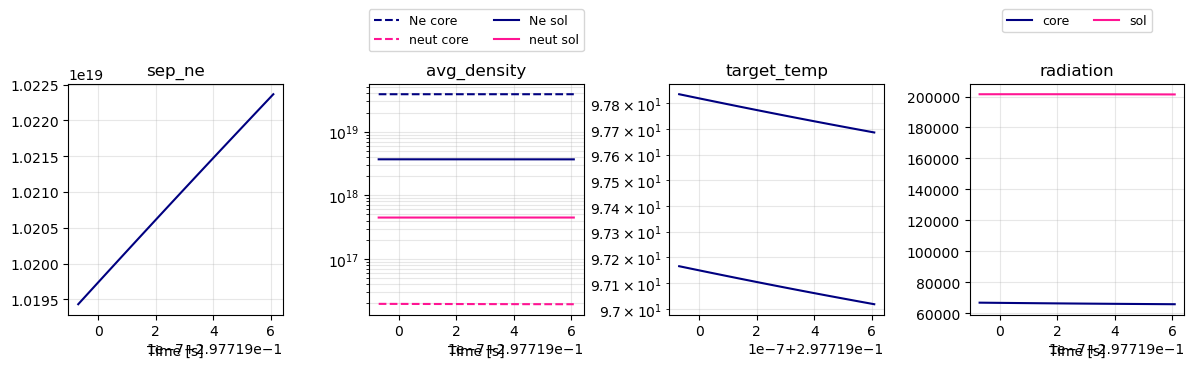

In [12]:
for casename in casestore.keys():
    print(casename)
    Monitor(casestore[casename], [
        # ["cvode_last_step", "cvode_ncalls_per_second", "cvode_evals", "cvode_fails_per_second"],
        ["sep_ne", "avg_density", "target_temp", "radiation"]
                ])

In [6]:
%matplotlib widget

In [13]:
ds = casestore["viscosity"].ds
ds = calculate_target_fluxes(ds)
ds = calculate_radial_fluxes(ds, force_neumann = False)
ds = calculate_particle_balance(ds)
ds = calculate_heat_balance(ds)

In [14]:
show_particle_balance_table(ds)
show_heat_balance_table(ds)

---------------------------------------
PARTICLE BALANCE
---------------------------------------
Domain volume: 1.942e+00 [m3]
Particle imbalance: -3.171e+20 [s-1]
Particle imbalance as frac of core + source: -21.14%
---------------------------------------
Total fluxes in [s-1]:


,d+,d,total
source,3.00e+20,1.20e+21,1.50e+21
core,0.00e+00,0.00e+00,0.00e+00
sol,0.00e+00,0.00e+00,0.00e+00
pfr,0.00e+00,0.00e+00,0.00e+00
targets,-2.42e+22,2.24e+22,-1.82e+21
iz,2.31e+22,-2.31e+22,0.00e+00
rec,-1.15e+18,1.15e+18,0.00e+00


---------------------------------------
HEAT BALANCE
---------------------------------------
Domain volume: 1.942e+00 [m3]
Power in: 1.762 [MW]
Power out: -1.387 [MW]
Power imbalance: 0.375 [MW]
Power imbalance as frac of power in: 21.31%
---------------------------------------
Total fluxes in [MW]:


,d,e,d+,total
source,0.00,0.76,1.00,1.76
core,0.00,0.00,0.00,0.00
sol,0.00,-0.00,0.00,0.00
pfr,0.00,0.00,0.00,0.00
targets,0.00,-0.51,-0.79,-1.30
rad_ex,nan,-0.09,nan,-0.09
rad_rec,nan,-0.00,nan,-0.00


<class 'list'>
<class 'list'>


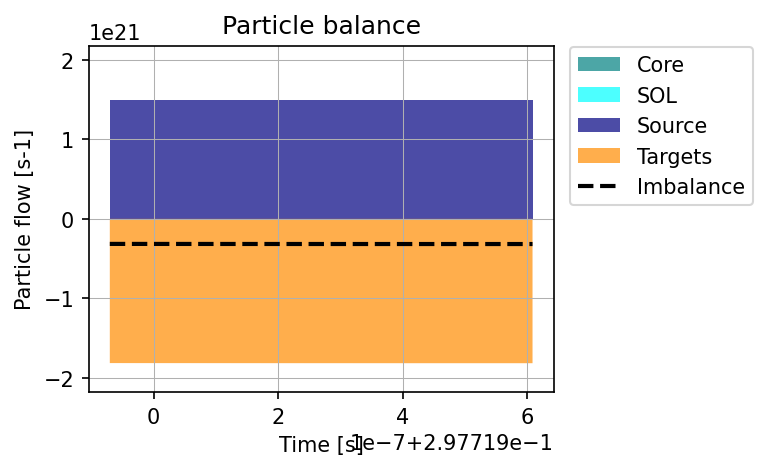

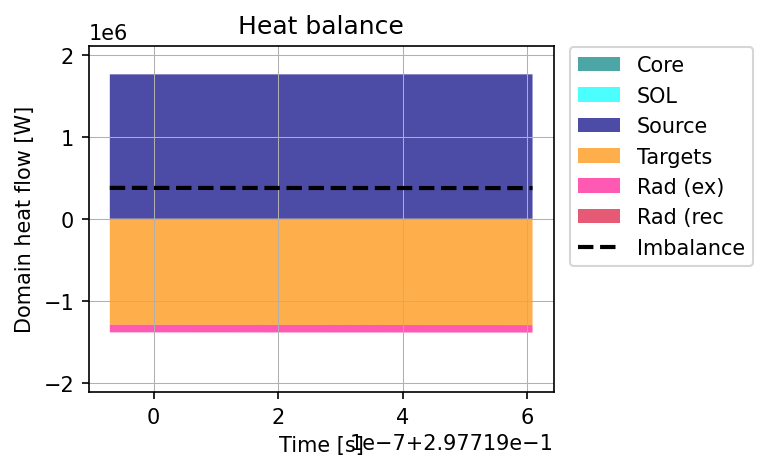

In [15]:
plot_particle_balance(ds)
plot_heat_balance(ds)

In [ ]:
from gridtools.solps_python_scripts.utilities.last10s import read_last10s
read_last10s(where = r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.Tpuff=3eV.MONO.Twall=3eV.MONO.Pfast=0", save = True)

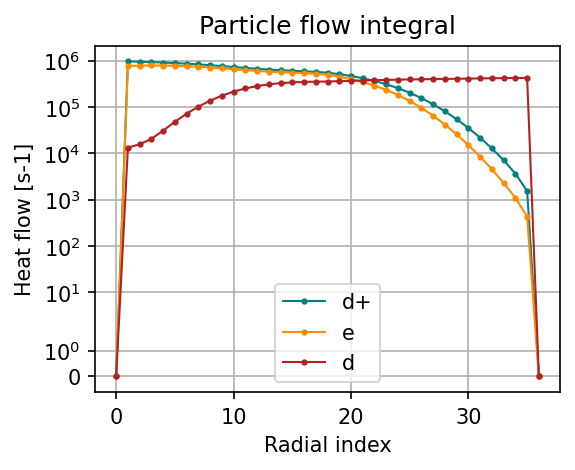

In [12]:
plot_perp_heat_fluxes(ds.isel(t=-1))

In [91]:
solps["noiz_core"] = SOLPSdata()
solps["noiz_core"].read_last10s(r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16")

"Pe" in solps["noiz_core"].regions["omp"]

C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16\last10s.pkl loaded


True

In [8]:
soledge = SOLEDGEdata()
soledge.read_csv(r"C:\Users\mikek\OneDrive\Project\collab\From\Luca\15-12-2022\To_Mike\plot1d_no_curr.csv", mode = "plot1d_omp")
soledge.read_csv(r"C:\Users\mikek\OneDrive\Project\collab\From\Luca\2023-02-21 - IMP profiles\plot1d_hfs_meters.csv", mode = "plot1d_imp")
soledge.read_csv(r"C:\Users\mikek\OneDrive\Project\collab\From\Luca\15-12-2022\To_Mike\wall_ntmpi_no_curr.csv", mode = "wall_ntmpi")

soledge_currents = SOLEDGEdata()
soledge_currents.read_csv(r"C:\Users\mikek\OneDrive\Project\collab\From\Luca\15-12-2022\To_Mike\plot1d_curr.csv", mode = "plot1d")
soledge_currents.read_csv(r"C:\Users\mikek\OneDrive\Project\collab\From\Luca\15-12-2022\To_Mike\wall_ntmpi_curr.csv", mode = "wall_ntmpi")


solps = dict()
solps["base"] = SOLPSdata()
solps["base"].read_last10s(r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF")

solps["noiz_core"] = SOLPSdata()
solps["noiz_core"].read_last10s(r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16")

solps["nofast_3evwall"] = SOLPSdata()
solps["nofast_3evwall"].read_last10s(r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.Tpuff=3eV.MONO.Twall=3eV.MONO.Pfast=0")

solps["nofast_pf0"] = SOLPSdata()
solps["nofast_pf0"].read_last10s(r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.Pf=0")

solps["orthogonal"] = SOLPSdata()
solps["orthogonal"].read_last10s(r"C:\Users\mikek\OneDrive\Project\collab\From\Matteo\2023-03-29 - orthogonal targets\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.fluid.Js=OFF.GAMMAE=4.5.BCCON=13.BCENEI=13.DIFF.CHIIE.barrier.DPUFF=1.2E+21.Psol=1.76MW")

solps["detached"] = SOLPSdata()
solps["detached"].read_last10s(r"C:\Users\mikek\OneDrive\Project\collab\From\Matteo\2023-03-29 - orthogonal targets\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.fluid.Js=OFF.GAMMAE=4.5.BCCON=13.BCENEI=13.DIFF.CHIIE.barrier.DPUFF=5.0E+21.Psol=1.76MW")

solps["soledge_h"] = SOLPSdata()
solps["soledge_h"].read_last10s(r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_hydrogen\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5")


hermes = dict()
for hermes_case in casestore.keys():
    print(hermes_case)
    hermes[hermes_case] = Hermesdata()
    hermes[hermes_case].read_case(casestore[hermes_case].ds.isel(t=-1, x = slice(2,-2)))


C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF\last10s.pkl loaded
C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16\last10s.pkl loaded
C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.Tpuff=3eV.MONO.Twall=3eV.MONO.Pfast=0\last10s.pkl loaded
C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.Pf=0\last10s.pkl loaded
C:\Users\mikek\OneDrive\Project\collab\From\Matteo\2023-03-29 - orthogonal targets\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.fluid.Js=

In [62]:
%matplotlib widget

In [20]:
%matplotlib qt

In [5]:
%matplotlib widget

# Plot core gradients

(-0.07017505055741913, 0.01)

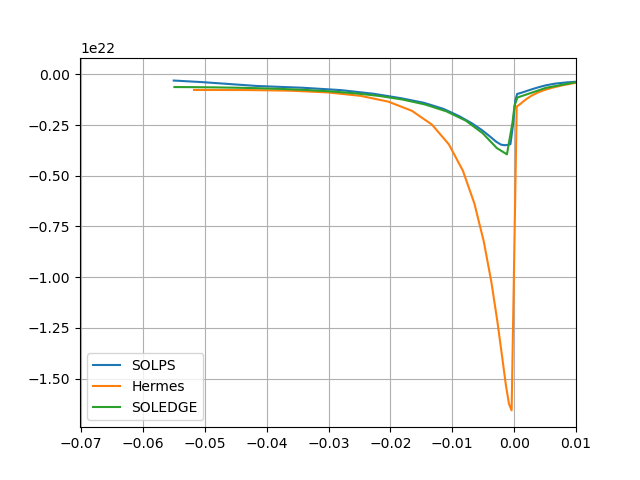

In [8]:
plt.close("all")
a = solps["base"].regions["omp"][parse_solps("Ne", "omp")]
b = hermes["fit_nsep"].regions["omp"]["Ne"]
c = soledge.regions["omp"]["Ne"]
# print("SOLPS",a.diff().head(5))
# print("Hermes-3",b.diff().head(5))
fig, ax = plt.subplots()

ax.plot(a.index, np.gradient(a, a.index), label = "SOLPS")
ax.plot(b.index, np.gradient(b, b.index), label = "Hermes")
ax.plot(c.index, np.gradient(c, c.index), label = "SOLEDGE")
# a.diff().plot(ax = ax, label = "SOLPS")
# b.diff().plot(ax = ax, label = "Hermes")
# c.diff().plot(ax = ax, label = "SOLEDGE")
ax.legend()
ax.grid()
ax.set_xlim(None, 0.01)

In [21]:
casestore.keys()

dict_keys(['fit', 'n_cooling'])

In [10]:
%matplotlib inline

C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16\last10s.pkl loaded


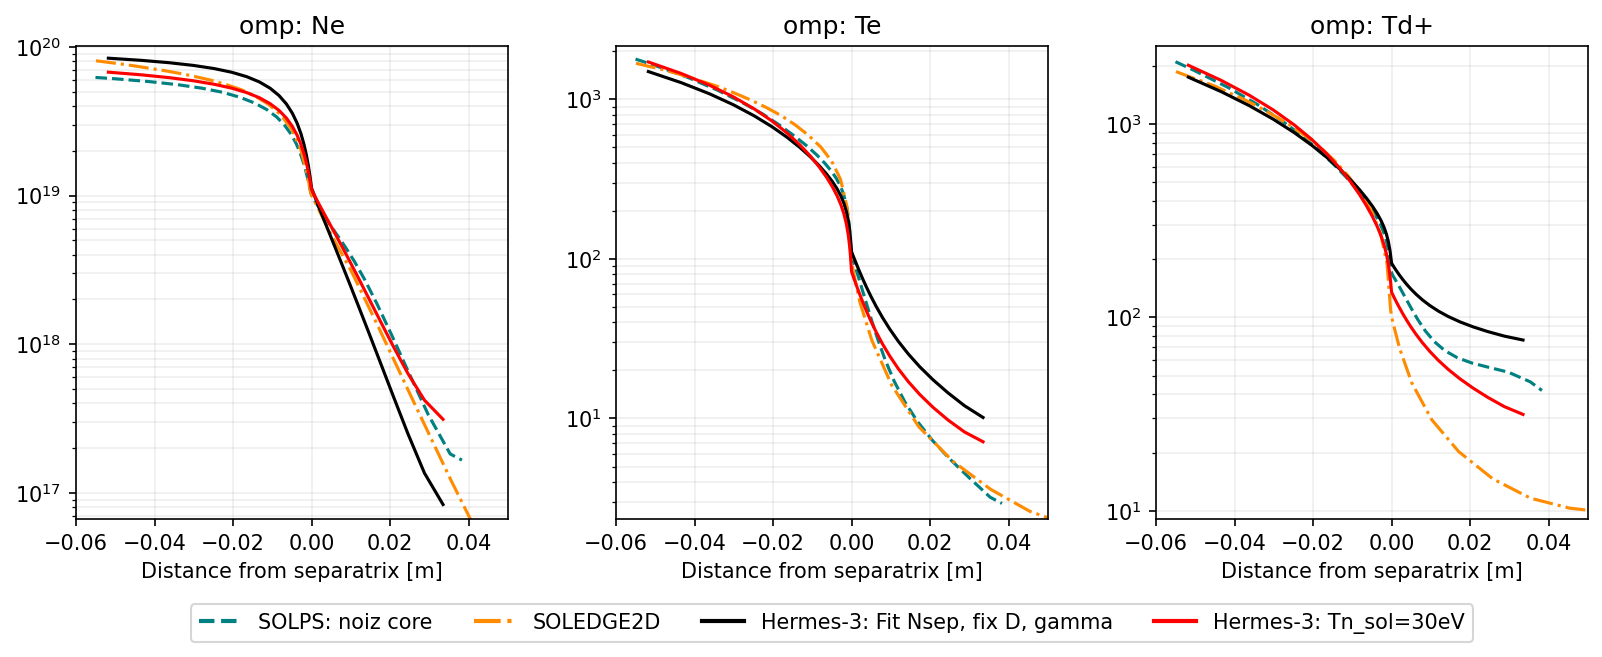

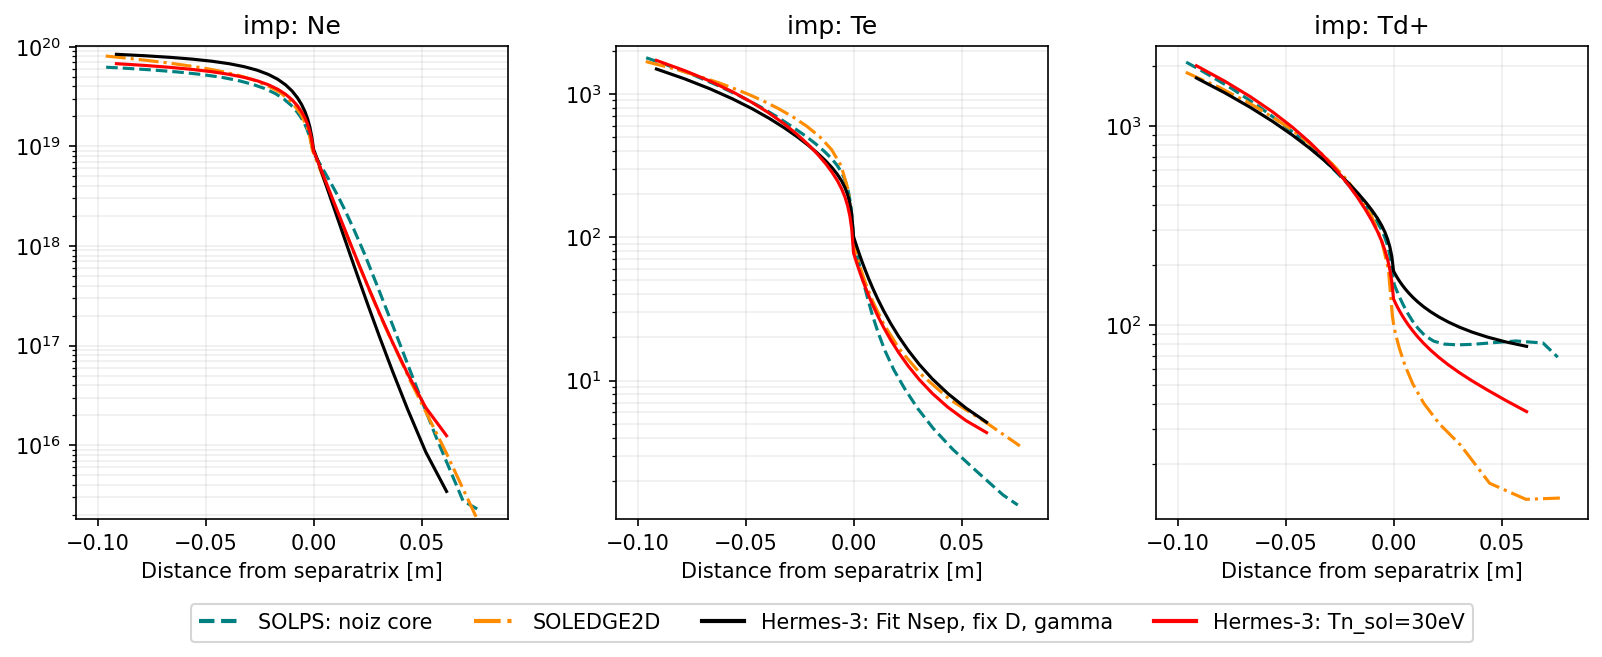

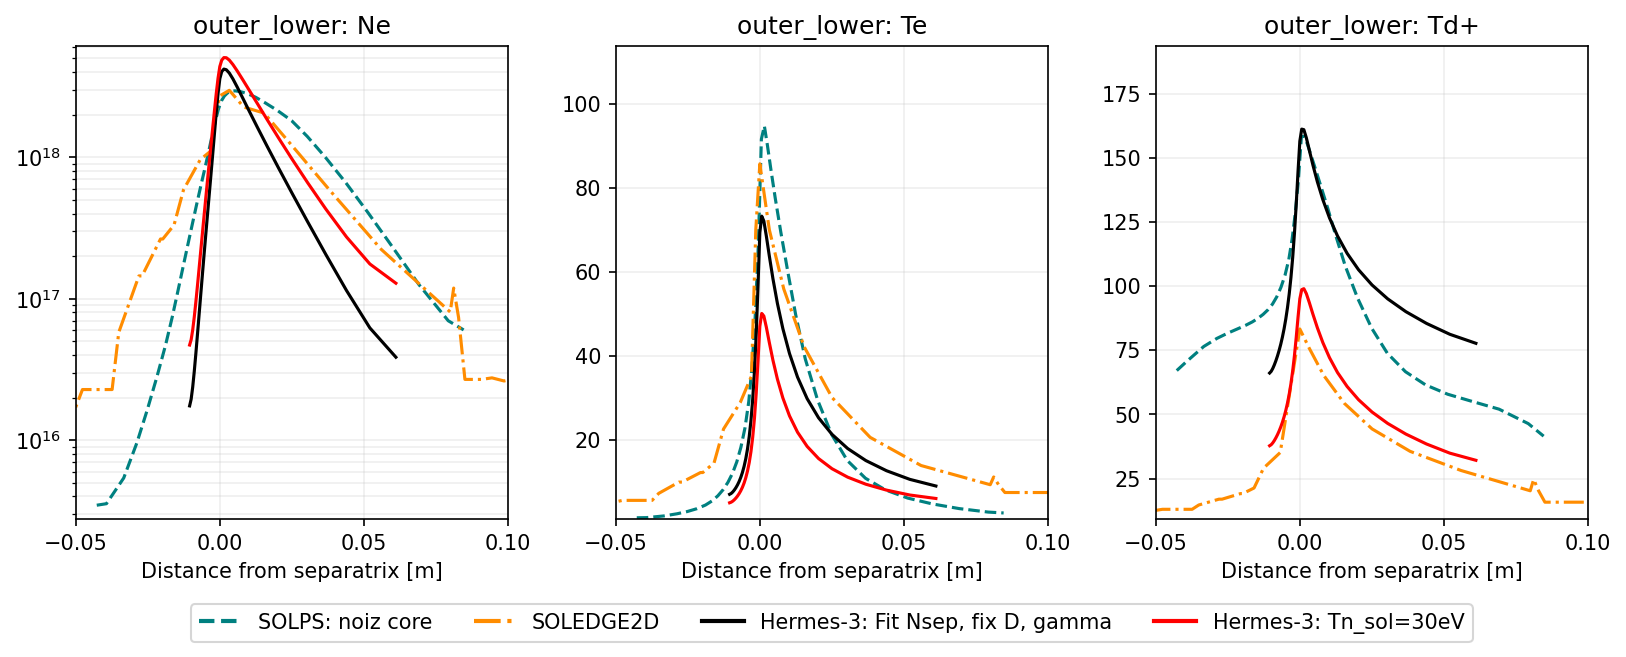

In [31]:
soledge = SOLEDGEdata()
soledge.read_csv(r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\soledge_nocurr_run1_files\omp.csv", mode = "plot1d_omp")
soledge.read_csv(r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\soledge_nocurr_run1_files\imp.csv", mode = "plot1d_imp")
soledge.read_csv(r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\soledge_nocurr_run1_files\wall_ntmpi_luca.csv", mode = "wall_ntmpi")

hermes["Base"] = Hermesdata()
hermes["Base"].read_case(casestore["fit"].ds.isel(t=-1, x = slice(2,-2)))
hermes["Cooled neutrals"] = Hermesdata()
hermes["Cooled neutrals"].read_case(casestore["n_cooling"].ds.isel(t=-1, x = slice(2,-2)))

solps["noiz_core"] = SOLPSdata()
solps["noiz_core"].read_last10s(r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16")

s = solps["noiz_core"]
s.regions["omp"].columns

plt.close("all")
lineplot_compare(
    cases = { 
    "SOLPS: noiz core" : solps["noiz_core"],
    "SOLEDGE2D": soledge, 
    "Hermes-3: Fit Nsep, fix D, gamma" : hermes["Base"],
    "Hermes-3: Tn_sol=30eV" : hermes["Cooled neutrals"],
    },
    colors = ["teal", "darkorange", "black", "red", "deeppink", "darkorange"],
    # regions = ["omp", "imp"], params = ["Ne", "Td+", "Te"],
    # regions = ["omp", "imp"], params = ["Nd", "Td", "Sd+_iz"],
    regions = ["omp", "imp", "outer_lower"], params = ["Ne", "Te", "Td+"],
    # regions = ["omp", "imp", "outer_lower"], params = ["Nd", "Td"],
    # regions = ["omp"], params = []
    mode = "log",
    dpi = 150
)

C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16\last10s.pkl loaded


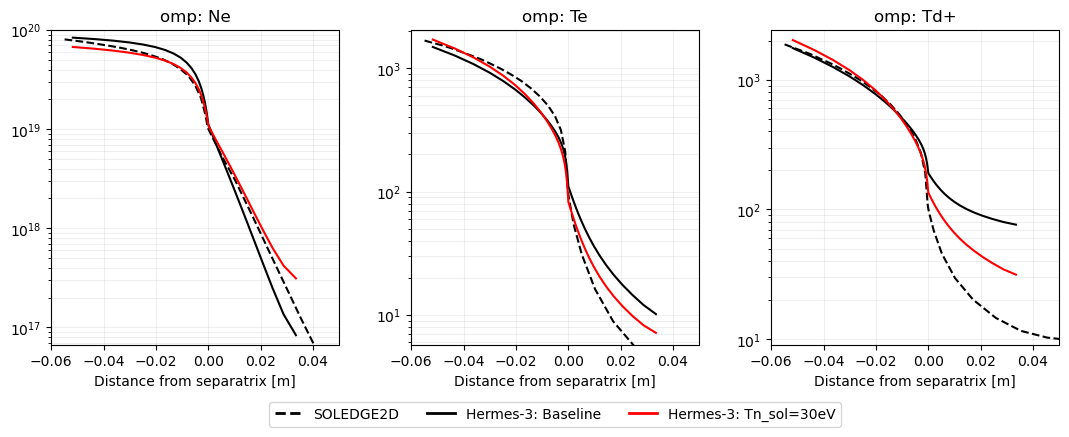

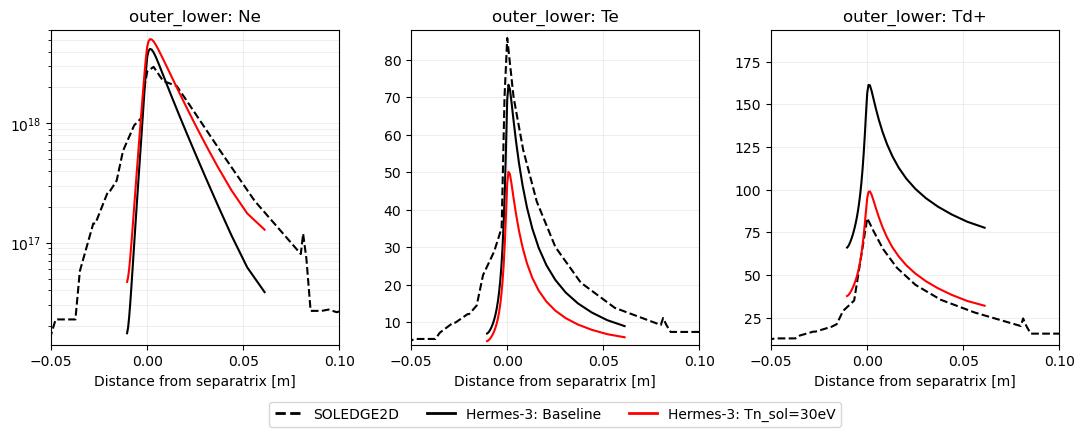

In [114]:
soledge = SOLEDGEdata()
soledge.read_csv(r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\soledge_nocurr_run1_files\omp.csv", mode = "plot1d_omp")
soledge.read_csv(r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\soledge_nocurr_run1_files\imp.csv", mode = "plot1d_imp")
soledge.read_csv(r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\soledge_nocurr_run1_files\wall_ntmpi_luca.csv", mode = "wall_ntmpi")

hermes["Base"] = Hermesdata()
hermes["Base"].read_case(casestore["fit"].ds.isel(t=-1, x = slice(2,-2)))
hermes["Cooled neutrals"] = Hermesdata()
hermes["Cooled neutrals"].read_case(casestore["n_cooling"].ds.isel(t=-1, x = slice(2,-2)))

solps["noiz_core"] = SOLPSdata()
solps["noiz_core"].read_last10s(r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16")

s = solps["noiz_core"]
s.regions["omp"].columns

plt.close("all")
lineplot_compare(
    cases = { 
    # "SOLPS: noiz core" : solps["noiz_core"],
    "SOLEDGE2D": soledge, 
    "Hermes-3: Baseline" : hermes["Base"],
    "Hermes-3: Tn_sol=30eV" : hermes["Cooled neutrals"],
    },
    colors = ["black", "black", "red", "red", "deeppink", "darkorange"],
    # regions = ["omp", "imp"], params = ["Ne", "Td+", "Te"],
    # regions = ["omp", "imp"], params = ["Nd", "Td", "Sd+_iz"],
    # regions = ["omp", "imp", "outer_lower"], params = ["Ne", "Te", "Td+", "Nd", "Td"],
    regions = ["omp", "outer_lower"], params = ["Ne", "Te", "Td+"],
    # regions = ["omp", "outer_lower"], params = ["Nd", "Td"],
    # regions = ["omp"], params = []
    mode = "log",
    dpi = 100
)

In [30]:
%matplotlib widget

In [28]:
casestore.keys()

dict_keys(['fit', 'n_cooling'])

Case 1
Cooled N
	load_plasma_files: Loading:  C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\run_directory/Results/plasma_0
	load_plasma_files: Loading:  C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\run_directory/Results/plasma_1
load_soledge_mesh_file: reading file  C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\run_directory\mesh.h5
	load_soledge_mesh_file: in_equ = OK
	h5_read: error reading:  /mesher/Fields/RadArroundXp
	load_soledge_mesh_file: extrapol = OK
	load_soledge_mesh_file: xPoints = OK
	load_soledge_mesh_file: Frontiers = OK
	load_soledge_mesh_file: Limits = OK
	h5_read: error reading:  /mesher/OMP_segment/mesher/refpoints/nPoints
	load_soledge_mesh_file: Segments = OK
	load_soledge_mesh_file: MagGrid_OK = OK
	load_soledge_mesh_file: new_equ = OK
	load_soledge_mesh_file: equ = OK
	load_soledge_mesh_file: Mesh = OK
	load_soledge_mesh_file: transp_prof = OK
	load_soledge_mesh_file: transp_values = OK
	h5_read: error reading:  /mesher/Feedback

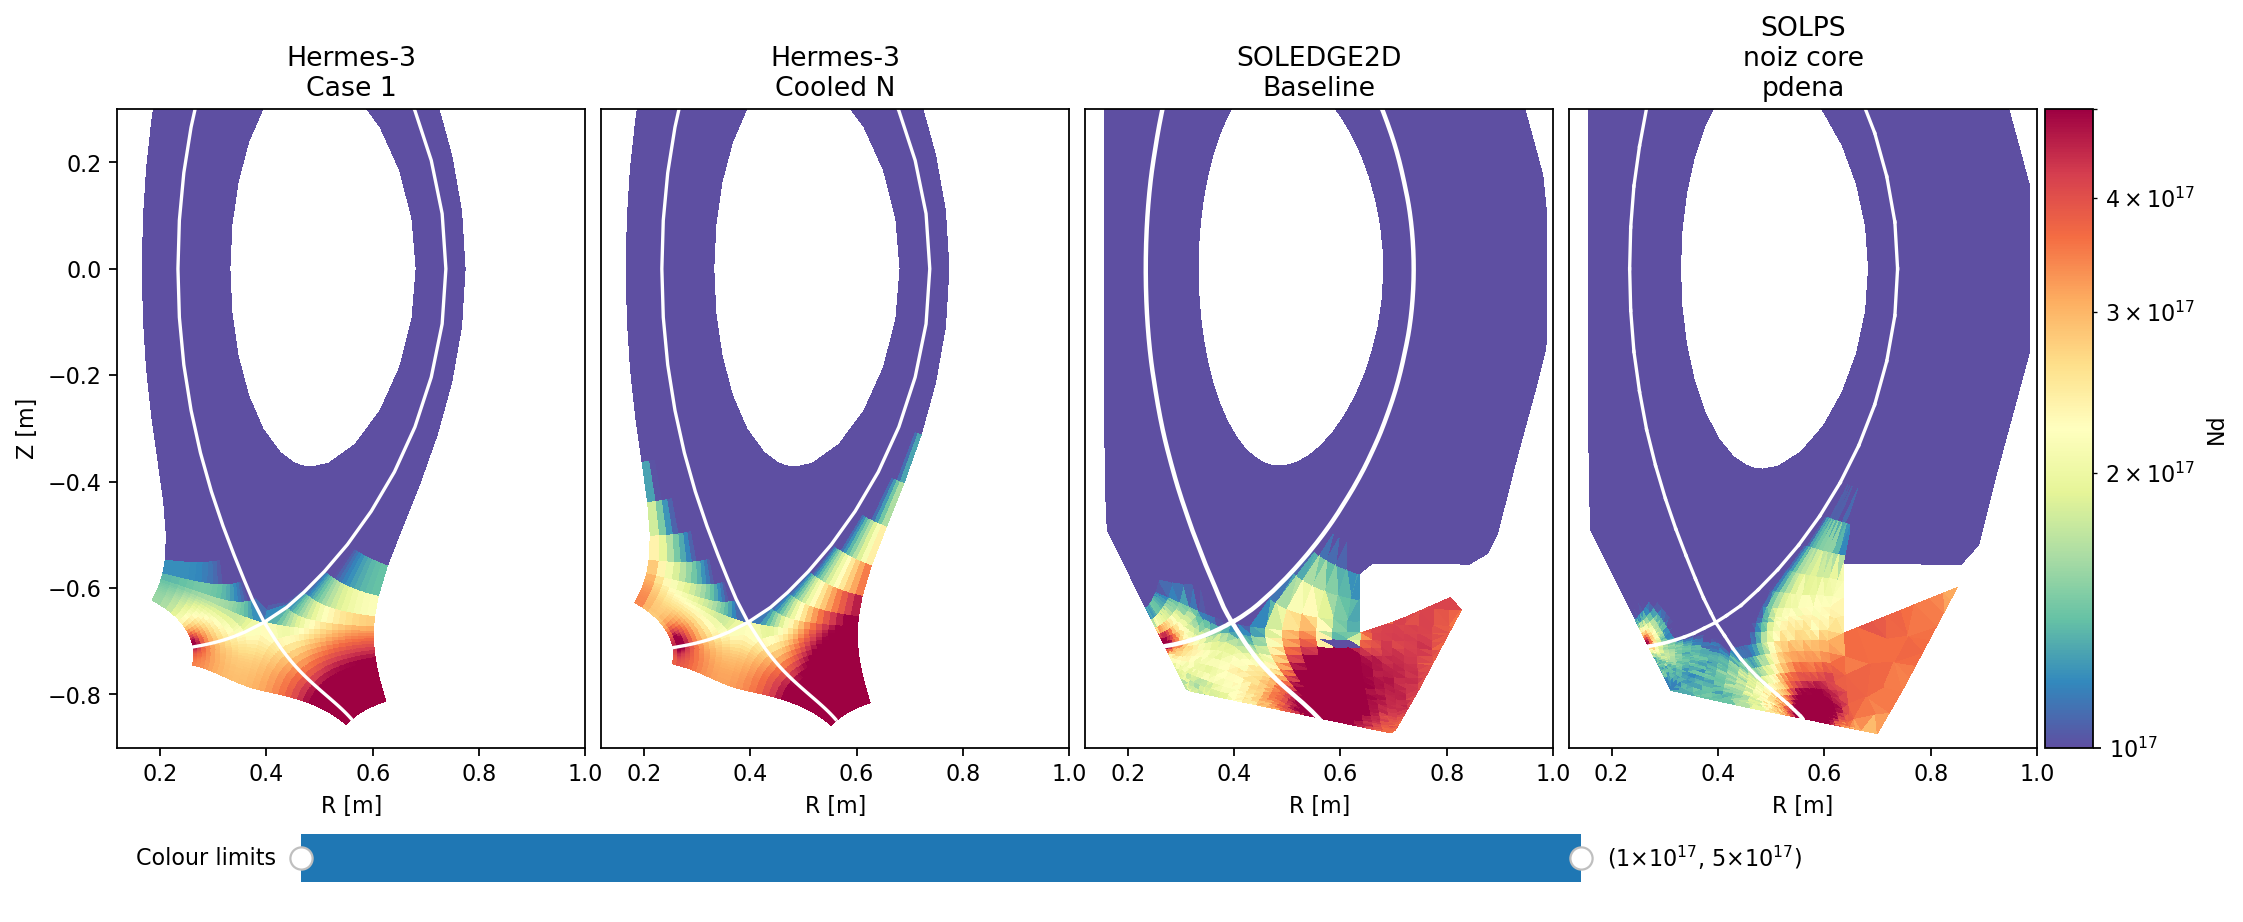

In [37]:
v = viewer_2d(
    "Nd",
    {
        "Case 1"  : {"code":"hermes", "ds" : casestore["fit"].ds.isel(t=-1)},
        "Cooled N"  : {"code":"hermes", "ds" : casestore["n_cooling"].ds.isel(t=-1)},
        "Baseline" : {"code":"soledge", "path" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\run_directory"},
        "noiz core" : {"code":"solps", "path" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16"}
        # "Tn = 30eV" : {"code":"hermes", "ds" : caseng.ds.isel(t=-1)}
    },
    logscale = True,
    # vmin = 10,
    # vmax = 2000,
    vmin = 1e17,
    vmax = 5e17,
    dpi = 160,
    ylim = (-0.9,0.3),
    # ylim = (-0.9, 0.9),
    xlim = (0.12, 1.0),
    wspace = 0.0,
    cmap = "Spectral_r"
)

In [80]:
from code_comparison.viewer_2d import *
plt.close("all")
v = viewer_2d(
    param = "Ne",
    cases =     {
        "base" : {"code" : "solps",  "path" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF"},
        # "Pf=0" : {"code" : "solps", "path" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.Pf=0"},
        "fit_nsep" : {"code" : "hermes", "ds" : casestore["fit_nsep"].ds.isel(t=-1)},
        # "core src" : {"code" : "hermes", "ds" : casestore["sources"].ds.isel(t=-1)},
        # "solps_base" : {"code" : "solps", "path" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF"},
        # "no core rec, BCCON=8" : {"code" : "solps", "path" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=8"}
        },
    # vmin = 1,
    # vmax = 150,
    xlim = (0.12, 1.0),
    # ylim = (-1, 1),
    ylim = (-1,0.2),
    
    logscale = False,
    dpi = 150,
    # antialias = True,
    # linewidth = 0.1,
    # color = "k"
    )

KeyError: 'fit_nsep'

In [38]:
cases =     {
        "base" : {"code" : "solps", "param_override" : "dab2", "path" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF"},
        "Pf=0" : {"code" : "solps", "path" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.Pf=0"},
        # "fit_nsep" : {"code" : "hermes", "ds" : casestore["fit_nsep"].ds.isel(t=-1)},
        # "core src" : {"code" : "hermes", "ds" : casestore["sources"].ds.isel(t=-1)},
        # "solps_base" : {"code" : "solps", "path" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF"},
        # "no core rec, BCCON=8" : {"code" : "solps", "path" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=8"}
        },

In [39]:
any(["hermes" in x["code"] for x in cases])

KeyError: 'code'

In [53]:
solps = SOLPSdata()
path = r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.Pf=0"
solps.read_last10s(path)
# solps.read_dataframes(r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\last10s_dfs")

C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF\last10s.pkl loaded


In [49]:
last10s = read_file(os.path.join(path, "last10s.pkl"))
dfs = dict()
        
for param in last10s.keys():
    # if any([x in param for x in ["ti3", "te3", "ne3", "dab23", "dmb23"]]):
    if len(np.array(last10s[param]).shape) == 2: 
        if last10s[param].shape[1] == 2:
            if any([param.endswith(x) for x in ["da", "dr", "di"]]):
                dfs[param] = pd.DataFrame(last10s[param])
                dfs[param].columns = ["pos", param]
                dfs[param] = dfs[param].set_index("pos")
                dfs[param].index = dfs[param].index.astype(float)
    
    
                if param.endswith("da"): #re.search(".*da", param):
                    self.params["omp"][param] = df
                    
                elif param.endswith("dr"):
                    self.params["outer_lower"][param] = df
                    
                elif param.endswith("di"):
                    self.params["imp"][param] = df

C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF\last10s.pkl loaded


# Recreate last10s

In [4]:
from gridtools.solps_python_scripts.utilities.last10s import read_last10s
import shutil
# from gridtools.solps_python_scripts.reactions.compute_rates import compute_rates

directory = r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data"

# for folder in os.listdir(directory):
#     if "HERMES_SOLEDGE" in folder:
#         print(folder)
#         casepath = os.path.join(directory,folder)
#         if "last10s.pkl" in os.listdir(casepath):
#             os.remove(os.path.join(casepath, "last10s.pkl"))
#         last10s = read_last10s(where = casepath, save = True)

path = r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_hydrogen\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5"
x = read_last10s(where = path, save = True)


read_last10s
fort.44 loaded from .pkl
b2fgmtry loaded from .pkl
compute_rates ...
b2fgmtry loaded from .pkl
b2fstate loaded from .pkl
fort.44 loaded from .pkl
fort.46 loaded from .pkl
read_all_reactions - reactions.pkl

  H.0, H.1, H.10 not yet implemented!

  H.0, H.1, H.10 not yet implemented!

  H.0, H.1, H.10 not yet implemented!

  H.0, H.1, H.10 not yet implemented!

  H.0, H.1, H.10 not yet implemented!


C:\Users\mikek\OneDrive\Project\python-packages\gridtools\solps_python_scripts\reactions\compute_rates.py:206: RuntimeWarning: divide by zero encountered in divide
  l0 = 1 / (np.sqrt(2) * sigma * n1)
C:\Users\mikek\OneDrive\Project\python-packages\gridtools\solps_python_scripts\reactions\compute_rates.py:207: RuntimeWarning: divide by zero encountered in divide
  l1 = 1 / (np.sqrt(2) * sigma * n0)


In [30]:
x = read_file(os.path.join(path, "last10s.pkl"))

C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF\last10s.pkl loaded


(-0.8546891342273759, 0.0)

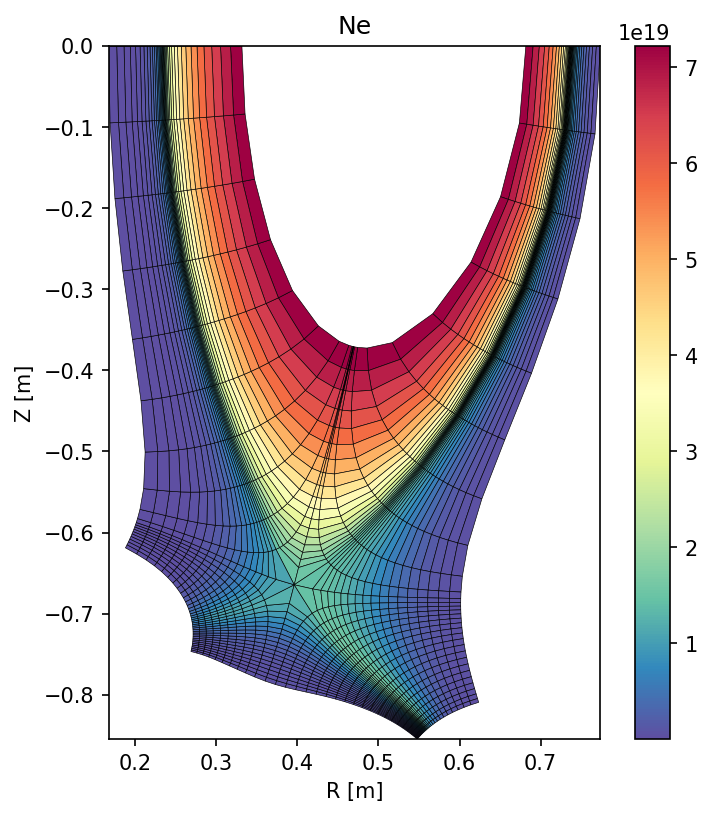

In [81]:
fig, ax = plt.subplots(figsize=(6,6), dpi = 150)
casestore["puff"].ds["Ne"].isel(t=-1, x = slice(2,-2)).bout.polygon(cmap = "Spectral_r", antialias=True, linewidth=0.3, ax = ax)
ax.set_ylim(None,0)

## Hermes density gradient vs. ionisation
- You can see that the gradient is basically all due to iz

Text(0, 0.5, 'IZ freq')

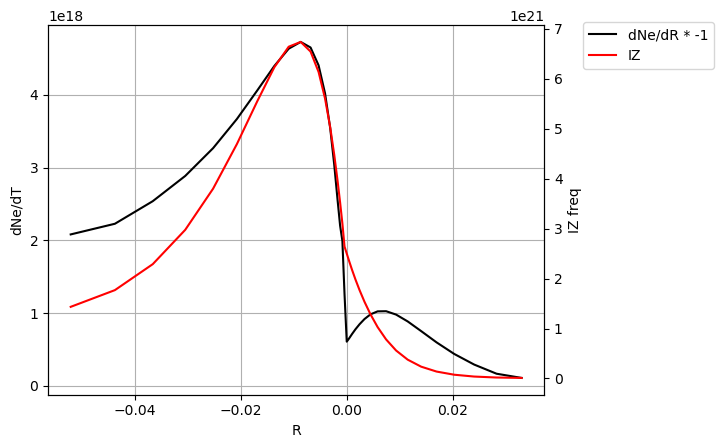

In [39]:
omp = caseng.select_region("outer_midplane_a").isel(t=-1)

fig, ax = plt.subplots()

ax2 = ax.twinx()

ax.plot(omp.coords["R"] - omp.coords["R"][19], omp["Ne"].differentiate("x")*-1, label = "dNe/dR * -1", c = "k")
ax2.plot(omp.coords["R"] - omp.coords["R"][19], omp["Sd+_iz"], label = "IZ", c = "r")

fig.legend(loc = "upper left", bbox_to_anchor=(0.95,0.9))
ax.set_xlabel("R")
ax.set_ylabel("dNe/dT")
ax.grid()
ax2.set_ylabel("IZ freq")
# .plot(ax = ax, label = "dNe/dx")


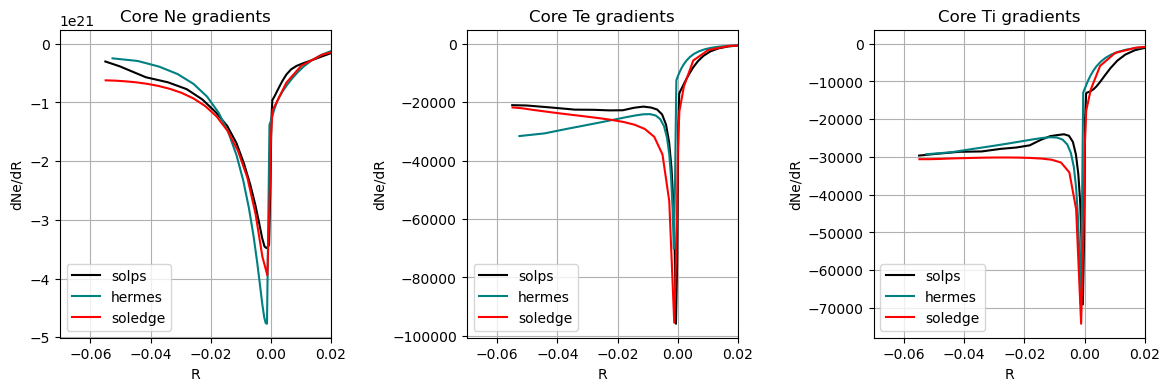

In [68]:
fig, axes = plt.subplots(1,3, figsize = (14,4))
fig.subplots_adjust(wspace=0.5)


ax = axes[0]
ax.set_title("Core Ne gradients")
ax.plot(solps.regions["omp"].index, np.gradient(solps.regions["omp"]["Ne"], solps.regions["omp"].index), label = "solps", c = "k")
ax.plot(hermes.regions["omp"].index, np.gradient(hermes.regions["omp"]["Ne"], hermes.regions["omp"].index), label = "hermes", c = "teal")
ax.plot(soledge.regions["omp"].index, np.gradient(soledge.regions["omp"]["Ne"], soledge.regions["omp"].index), label = "soledge", c = "r")
ax.set_ylabel("dNe/dR")


ax = axes[1]
ax.set_title("Core Te gradients")
ax.plot(solps.regions["omp"].index, np.gradient(solps.regions["omp"]["Te"], solps.regions["omp"].index), label = "solps", c = "k")
ax.plot(hermes.regions["omp"].index, np.gradient(hermes.regions["omp"]["Te"], hermes.regions["omp"].index), label = "hermes", c = "teal")
ax.plot(soledge.regions["omp"].index, np.gradient(soledge.regions["omp"]["Te"], soledge.regions["omp"].index), label = "soledge", c = "r")
ax.set_ylabel("dNe/dR")

ax = axes[2]
ax.set_title("Core Ti gradients")
ax.plot(solps.regions["omp"].index, np.gradient(solps.regions["omp"]["Td+"], solps.regions["omp"].index), label = "solps", c = "k")
ax.plot(hermes.regions["omp"].index, np.gradient(hermes.regions["omp"]["Td+"], hermes.regions["omp"].index), label = "hermes", c = "teal")
ax.plot(soledge.regions["omp"].index, np.gradient(soledge.regions["omp"]["Td+"], soledge.regions["omp"].index), label = "soledge", c = "r")
ax.set_ylabel("dNe/dR")




for ax in axes:
    ax.set_xlim(None, 0.02)
    ax.set_xlabel("R")
    ax.grid()
    ax.legend(loc = "lower left")

# Puff OMP penetration

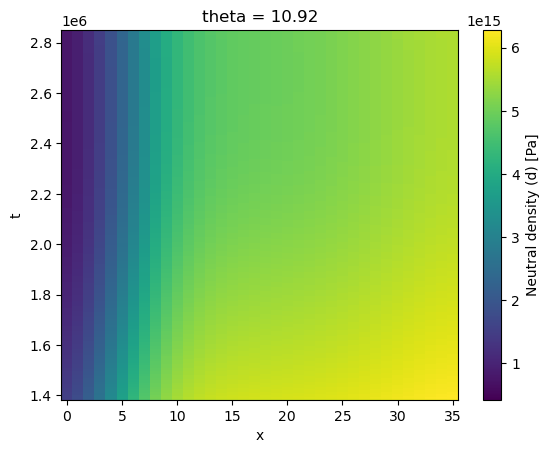

In [5]:
omp = caseng.select_region("outer_midplane_a")["Nd"]


caseng.select_region("outer_midplane_a")["Nd"].plot()

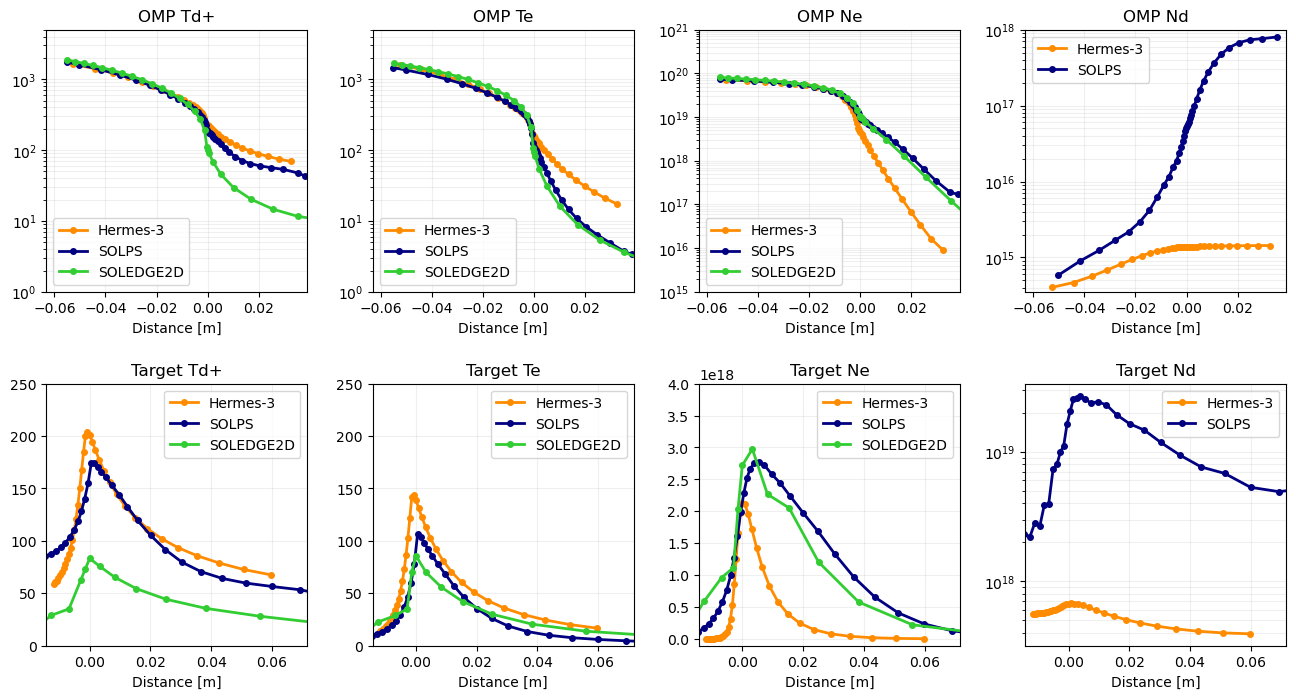

In [4]:
cases = {
    "Hermes-3": hermes, 
    "SOLPS" : solps, 
    "SOLEDGE2D": soledge, 
    # "SOLEDGE2D curr": soledge_currents
         }

cols=4; rows=2
fig, axes = plt.subplots(rows,cols, dpi = 100, figsize = (4*cols,4*rows))
fig.subplots_adjust(hspace = 0.35, wspace = 0.25)
colors = ["darkorange", "navy", "limegreen", "firebrick",  "limegreen", "magenta","cyan", "navy"]

marker = "o"
ms = 4
lw = 2

set_ylims_omp = {"Td+": (1, 0.5e4), "Te": (1, 0.5e4), "Ne": (1e15, 1e21), "Nd": (None, 1e18)}
set_yscales_omp = {"Td+": "log", "Te": "log", "Ne": "log", "Nd": "log"}
set_axes_omp = {"Td+": axes[0,0], "Te": axes[0,1], "Ne": axes[0,2], "Nd": axes[0,3]}

set_ylims_target = {"Td+": (0, 250), "Te": (0, 250), "Ne": (None, 4e18), "Nd": (None, None)}
set_yscales_target = {"Td+": "linear", "Te": "linear", "Ne": "linear", "Nd": "log"}
set_axes_target = {"Td+": axes[1,0], "Te": axes[1,1], "Ne": axes[1,2], "Nd": axes[1,3]}
    
for param in set_ylims_omp.keys():
    
    for i, case in enumerate(cases.keys()):
        
        data = cases[case].omp
        if param in data.columns:
            set_axes_omp[param].plot(data.index, data[param], label = case, c = colors[i], marker = marker, ms = ms, lw = lw)
            set_axes_omp[param].set_ylim(set_ylims_omp[param])
            set_axes_omp[param].set_yscale(set_yscales_omp[param])
            set_axes_omp[param].set_xlim(cases["Hermes-3"].omp.index[0] * 1.2, cases["Hermes-3"].omp.index[-1] * 1.2)
            set_axes_omp[param].set_title(f"OMP {param}")
            
        data = cases[case].outer_lower
        if param in data.columns:
            set_axes_target[param].plot(data.index, data[param], label = case, c = colors[i], marker = marker, ms = ms, lw = lw)
            if set_ylims_target[param] != (None,None):
                set_axes_target[param].set_ylim(set_ylims_target[param])
            set_axes_target[param].set_yscale(set_yscales_target[param])
            set_axes_target[param].set_xlim(cases["Hermes-3"].outer_lower.index[0] * 1.2, cases["Hermes-3"].outer_lower.index[-1]*1.2)
            set_axes_target[param].set_title(f"Target {param}")
    
    
# for j in range(cols):
#     axes[0, j].set_xlim(None, 0.05)

for i in range(rows):
    for j in range(cols):
        axes[i,j].grid(which="both", alpha = 0.2)
        axes[i,j].set_xlabel("Distance [m]")
        axes[i,j].legend()

In [191]:
self.omp = self.compile_results(self.case.select_region("outer_midplane_a").isel(t=-1))

In [2]:
# b2path = r"C:\Users\mikek\OneDrive\Project\collab\From\Matteo\initial_solps_cases_2022-12-06\20221206_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK"
# b2path = r"C:\Users\mikek\OneDrive\Project\collab\From\Matteo\initial_solps_cases_2022-12-06\20221206_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.input.dat.OK"

# b2path = r"C:\Users\mikek\OneDrive\Project\collab\From\Matteo\initial_solps_cases_2022-12-06\20221206_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=ON"

last10path = r"C:\Users\mikek\OneDrive\Project\collab\From\Matteo\initial_solps_cases_2022-12-06\20221206_HERMES_SOLEDGE_last10s\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK"

You should be particularly interested in last10s.pkl. Some comments and useful quantities:
- Format XX3dY where XX is the variable name and Y the location, .shape = (ny,2) where ny is the number of radial cells and 2 the number of columns (0 = radial coordinate (m) with 0.0m on separatrix, 1 = variable value with conventional units)
- Of interest to you (1D profiles):
- XX = {ne, te, ti, ft} i.e. electron density, electron and ion temperature, total perpendicular heat flux (only at targets)
- Y = {a, i, l, r} i.e. outer and inner mid-plane, inner and outer target
- You have all the data to plot 2D maps as well: I recall I shared my solps_python_routines, haven’t I? If so, you could rely on the following command (called from within the directory):
- >plot_2d(what = [“X”, “Y”, “Z”, …])
- X, Y, Z, … = {ne, te, ti, pdena, dab2, pdenm, dmb2, tdena, tab2, tdenm, tmb2} i.e. electron density, electron and ion temperature, atom density on EIRENE mesh, atom density on B2 mesh (HERMES-like), molecule density on EIRENE mesh, molecule density on B2 mesh, and same with temperatures.

In [151]:
db = CaseDB()

choice = choice = "c3a-1.116e6_crash"

case, caseng = Load.case_2D(db.casepaths[choice], gridfilepath = db.gridpaths["g3a5-fatter.nc"],
                    double_load = True)

--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.942E+00 [m3]
--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.556E+00 [m3]


In [5]:
target = Target(case, "outer_lower")
omp = caseng.select_region("outer_midplane_a").isel(t=-1)

In [12]:
solps = read_file(r"C:\Users\mikek\OneDrive\Project\python-packages\sdtools\data\last10s_dfs")

C:\Users\mikek\OneDrive\Project\python-packages\sdtools\data\last10s_dfs loaded


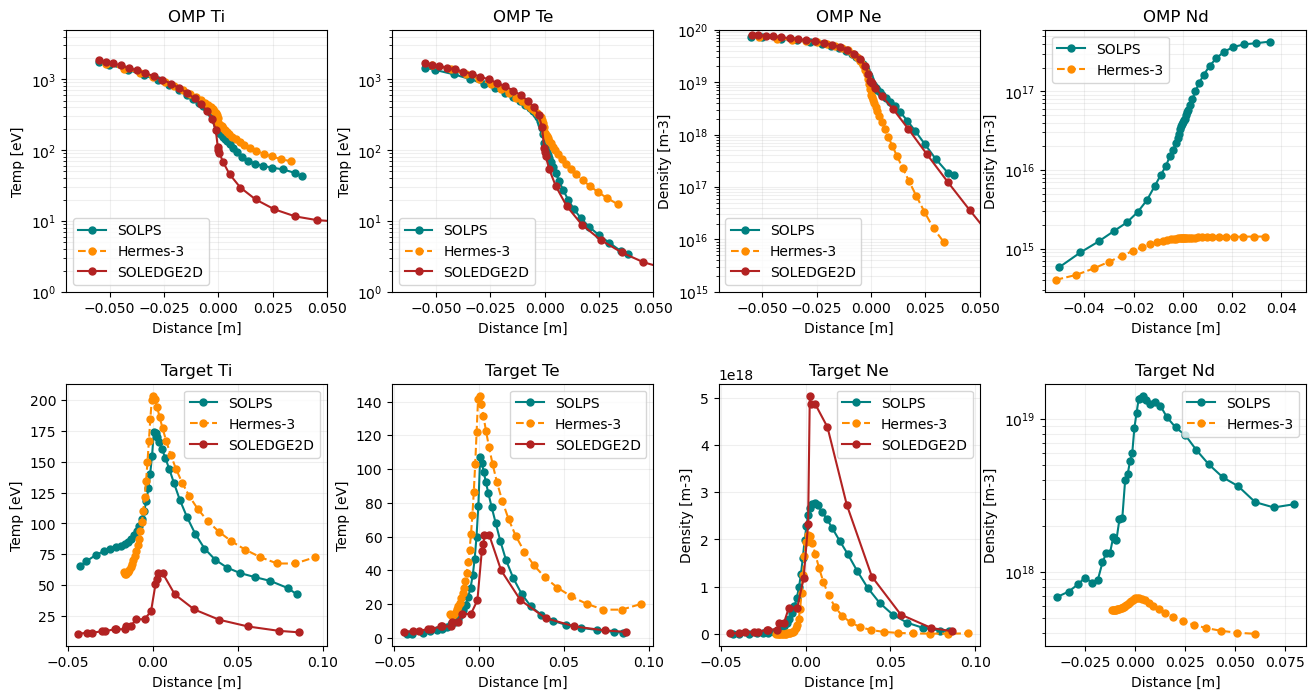

In [69]:
# solps = read_file(r"/users/mjk557/scratch/last10s.pkl")


target = Target(case, "outer_lower")
omp = case.select_region("outer_midplane_a").isel(t=-1, x=slice(2,-2))
target_region = case.select_region("outer_lower_target").isel(t=-1, x=slice(2,-2))


xsep = 0.736

offset_t = -0.018

cols=4; rows=2
fig, axes = plt.subplots(rows,cols, dpi = 100, figsize = (4*cols,4*rows))
fig.subplots_adjust(hspace = 0.35, wspace = 0.25)
colors = ["teal", "darkorange", "firebrick",  "limegreen", "magenta","cyan", "navy"]

marker = "o"
ms = 5

def plot_solps(param, ax, label = "SOLPS", c = colors[0]):
    ax.plot(solps[param][0], solps[param][1], c = c, label = label, marker = marker, markersize = ms)
    

ax = axes[0,0]; ax.set_title("OMP Ti"); ax.set_ylabel("Temp [eV]")
plot_solps("ti3da", ax)
ax.plot(omp["R"]-xsep, omp["Td+"], c = colors[1], ls = "--", label = "Hermes-3", marker = marker, markersize = ms)
ax.plot(soledge["DIST"], soledge["Tempi"], c = colors[2], label = "SOLEDGE2D", marker = marker, markersize = ms)
ax.set_yscale("log"); ax.set_ylim(1, 5000)

ax = axes[0,1]; ax.set_title("OMP Te"); ax.set_ylabel("Temp [eV]")
plot_solps("te3da", ax)
ax.plot(omp["R"]-xsep, omp["Te"], c = colors[1], ls = "--", label = "Hermes-3", marker = marker, markersize = ms)
ax.plot(soledge["DIST"], soledge["Tempe"], c = colors[2], label = "SOLEDGE2D", marker = marker, markersize = ms)
ax.set_yscale("log"); ax.set_ylim(1, 5000)

ax = axes[0,2]; ax.set_title("OMP Ne"); ax.set_ylabel("Density [m-3]")
plot_solps("ne3da", ax)
ax.plot(omp["R"]-xsep, omp["Ne"], c = colors[1], ls = "--", label = "Hermes-3", marker = marker, markersize = ms)
ax.plot(soledge["DIST"], soledge["Dense"], c = colors[2], label = "SOLEDGE2D", marker = marker, markersize = ms)
ax.set_yscale("log"); ax.set_ylim(1e15, 1e20)

ax = axes[0,3]; ax.set_title("OMP Nd"); ax.set_ylabel("Density [m-3]")
ax.plot(solps["dab23da"][0], solps["dab23da"][1] + solps["dmb23da"][1], c = colors[0], label = "SOLPS", marker = marker, markersize = ms)
ax.plot(omp["R"]-xsep, omp["Nd"], c = colors[1], ls = "--", label = "Hermes-3", marker = marker, markersize = ms)
ax.set_yscale("log"); #ax.set_ylim(1e17, 1e20)

# soledge target settings
st_slice = slice(260,-73)
st_offset = -3.735

ax = axes[1,0]; ax.set_title("Target Ti"); ax.set_ylabel("Temp [eV]")
plot_solps("ti3dr", ax)
ax.plot(target.r + offset_t, target.temperature[-1,:], c = colors[1], ls = "--", label = "Hermes-3", marker = marker, markersize = ms)
ax.plot(soledge_wall_ntmpi.index[st_slice] + (st_offset), soledge_wall_ntmpi["Ti"].iloc[st_slice], c = colors[2], label = "SOLEDGE2D", marker = marker, markersize = ms)
ax.legend()

ax = axes[1,1]; ax.set_title("Target Te"); ax.set_ylabel("Temp [eV]")
plot_solps("te3dr", ax)
ax.plot(target.r + offset_t, target.electron_temperature[-1,:], c = colors[1], ls = "--", label = "Hermes-3", marker = marker, markersize = ms)
ax.plot(soledge_wall_ntmpi.index[st_slice] + (st_offset), soledge_wall_ntmpi["Te"].iloc[st_slice], c = colors[2], label = "SOLEDGE2D", marker = marker, markersize = ms)
ax.legend()

ax = axes[1,2]; ax.set_title("Target Ne"); ax.set_ylabel("Density [m-3]")
plot_solps("ne3dr", ax)
ax.plot(target.r + offset_t, target.density[-1,:], c = colors[1], ls = "--", label = "Hermes-3", marker = marker, markersize = ms)
ax.plot(soledge_wall_ntmpi.index[st_slice] + (st_offset), soledge_wall_ntmpi["Ne"].iloc[st_slice], c = colors[2], label = "SOLEDGE2D", marker = marker, markersize = ms)

ax = axes[1,3]; ax.set_title("Target Nd"); ax.set_ylabel("Density [m-3]")
ax.plot(solps["dab23dr"][0], solps["dab23dr"][1] + solps["dmb23dr"][1], c = colors[0], label = "SOLPS", marker = marker, markersize = ms)
ax.plot(target_region["R"]-target_region["R"][20], target_region["Nd"], c = colors[1], ls = "--", label = "Hermes-3", marker = marker, markersize = ms)
# ax.plot(target_region-xsep, omp["Nd"], c = colors[1], ls = "--", label = "Hermes-3", marker = marker, markersize = ms)
ax.set_yscale("log"); #ax.set_ylim(1e17, 1e20)

for j in range(cols):
    axes[0, j].set_xlim(None, 0.05)

for i in range(rows):
    for j in range(cols):
        axes[i,j].grid(which="both", alpha = 0.2)
        axes[i,j].set_xlabel("Distance [m]")
        axes[i,j].legend()
    

In [4]:
last10 = file_read(os.path.join(b2path, "last10s.pkl"))

TypeError: data type 'f16' not understood